# Dark photon kinematics

I want to plot pT, eta, Lxy, and dPhi to show the range of relevant values and provide an understanding of how these quantities depend on bound state mass, dark photon mass, and dark photon proper decay length. I expect the plots produced here will end up in the AN.

In [1]:
# python
import sys
import os
import importlib
# columnar analysis
from coffea import processor
import awkward as ak
from dask.distributed import Client
# local
sys.path.insert(1, os.path.join(sys.path[0], '../..')) # fixme: there must be a better way to handle this...
from sidm.tools import ffschema, sidm_processor, utilities
# always reload local modules to pick up changes during development
importlib.reload(ffschema)
importlib.reload(sidm_processor)
importlib.reload(utilities)
# plotting
import matplotlib.pyplot as plt
utilities.set_plot_style()
%matplotlib inline

Dark photon pT, eta, and dPhi depend alost entirely on the bound state mass, so hold dark photon mass and ctau constant and plot pT, eta, and dPhi vs bound state mass.

In [2]:
samples = [
    "2Mu2E_100GeV_1p2GeV_9p6mm",
    "2Mu2E_150GeV_1p2GeV_6p4mm",
    "2Mu2E_200GeV_1p2GeV_4p8mm",
    "2Mu2E_500GeV_1p2GeV_1p9mm",
    "2Mu2E_800GeV_1p2GeV_1p2mm",
    "2Mu2E_1000GeV_1p2GeV_0p96mm",
]
fileset = utilities.make_fileset(samples, "ffntuple_v4")

runner = processor.Runner(
    #executor=processor.IterativeExecutor(),
    executor=processor.FuturesExecutor(),
    schema=ffschema.FFSchema,
    #maxchunks=1,
)

channels = ["baseNoLj"]
p = sidm_processor.SidmProcessor(
    channels,
    ["genA_base"],
)

output = runner.run(fileset, treename="ffNtuplizer/ffNtuple", processor_instance=p)
out = output["out"]

Output()

Output()

Not applying any cuts to the lepton jets for channel  baseNoLj
Not applying any cuts to the lepton jets for channel  baseNoLj
Not applying any cuts to the lepton jets for channel  baseNoLj
Not applying any cuts to the lepton jets for channel  baseNoLj
Not applying any cuts to the lepton jets for channel  baseNoLj
Not applying any cuts to the lepton jets for channel  baseNoLj
Not applying any cuts to the lepton jets for channel  baseNoLj
Not applying any cuts to the lepton jets for channel  baseNoLj
Not applying any cuts to the lepton jets for channel  baseNoLj
Not applying any cuts to the lepton jets for channel  baseNoLj
Not applying any cuts to the lepton jets for channel  baseNoLj
Not applying any cuts to the lepton jets for channel  baseNoLj
Not applying any cuts to the lepton jets for channel  baseNoLj
Not applying any cuts to the lepton jets for channel  baseNoLj
Not applying any cuts to the lepton jets for channel  baseNoLj
Not applying any cuts to the lepton jets for channel  b

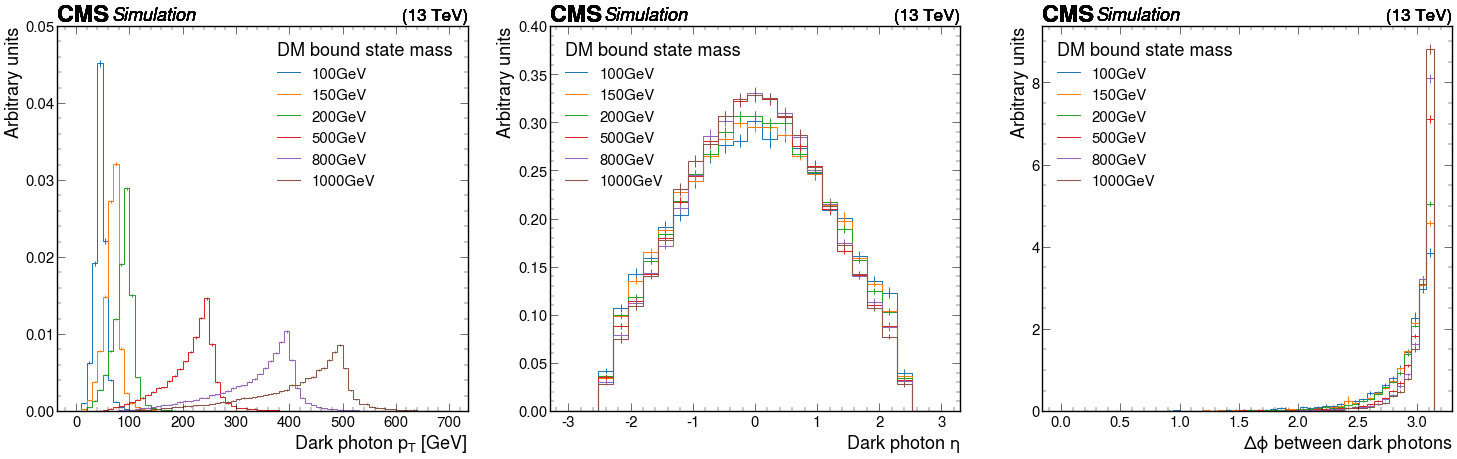

In [3]:
masses = [s.split("_")[1] for s in samples]
plt.subplots(1, 3, figsize=(36, 10))
plt.subplot(1, 3, 1)
for sample in samples:
    utilities.plot(out[sample]["hists"]["genA_pt_highRange"][channels[0], ::2j], density=True)
    plt.legend(masses, title="DM bound state mass", alignment="left")
    plt.ylim(0, 0.05)
    plt.ylabel("Arbitrary units")
plt.subplot(1, 3, 2)
for sample in samples:
    utilities.plot(out[sample]["hists"]["genA_eta_phi"][channels[0], ::2j, :].project("genA_eta"), density=True)
    plt.legend(masses, title="DM bound state mass", alignment="left", loc="upper left")
    plt.ylim(0, 0.4)
    plt.ylabel("Arbitrary units")
plt.subplot(1, 3, 3)
for sample in samples:
    utilities.plot(out[sample]["hists"]["genA_genA_dphi"][channels[0], :], density=True)
    plt.legend(masses, title="DM bound state mass", alignment="left", loc="upper left")
    #plt.ylim(0, 7)
    plt.ylabel("Arbitrary units")
plt.savefig("../../plots/dark_photon_pt_eta_deltaPhi.pdf", bbox_inches="tight")

Great, no surprises here. Next plot dark photon Lxy as a function of dark photon ctau while holding the dark photon and bound state masses fixed.

In [4]:
extra_ctau_samples = [
    "2Mu2E_200GeV_1p2GeV_0p048mm",
    "2Mu2E_200GeV_1p2GeV_0p48mm",
    "2Mu2E_200GeV_1p2GeV_4p8mm",
    "2Mu2E_200GeV_1p2GeV_48mm",
]
extra_ctau_fileset = utilities.make_fileset(extra_ctau_samples, "ffntuple_v4")

runner = processor.Runner(
    #executor=processor.IterativeExecutor(),
    executor=processor.FuturesExecutor(),
    schema=ffschema.FFSchema,
    #maxchunks=1,
)

channels = ["baseNoLj"]
p = sidm_processor.SidmProcessor(
    channels,
    ["genA_base"],
)

extra_ctau_output = runner.run(extra_ctau_fileset, treename="ffNtuplizer/ffNtuple", processor_instance=p)
extra_ctau_out = extra_ctau_output["out"]

Output()

Output()

Not applying any cuts to the lepton jets for channel  baseNoLj
Not applying any cuts to the lepton jets for channel  baseNoLj
Not applying any cuts to the lepton jets for channel  baseNoLj
Not applying any cuts to the lepton jets for channel  baseNoLj
Not applying any cuts to the lepton jets for channel  baseNoLj
Not applying any cuts to the lepton jets for channel  baseNoLj
Not applying any cuts to the lepton jets for channel  baseNoLj
Not applying any cuts to the lepton jets for channel  baseNoLj
Not applying any cuts to the lepton jets for channel  baseNoLj
Not applying any cuts to the lepton jets for channel  baseNoLj
Not applying any cuts to the lepton jets for channel  baseNoLj
Not applying any cuts to the lepton jets for channel  baseNoLj
Not applying any cuts to the lepton jets for channel  baseNoLj
Not applying any cuts to the lepton jets for channel  baseNoLj
Not applying any cuts to the lepton jets for channel  baseNoLj
Not applying any cuts to the lepton jets for channel  b

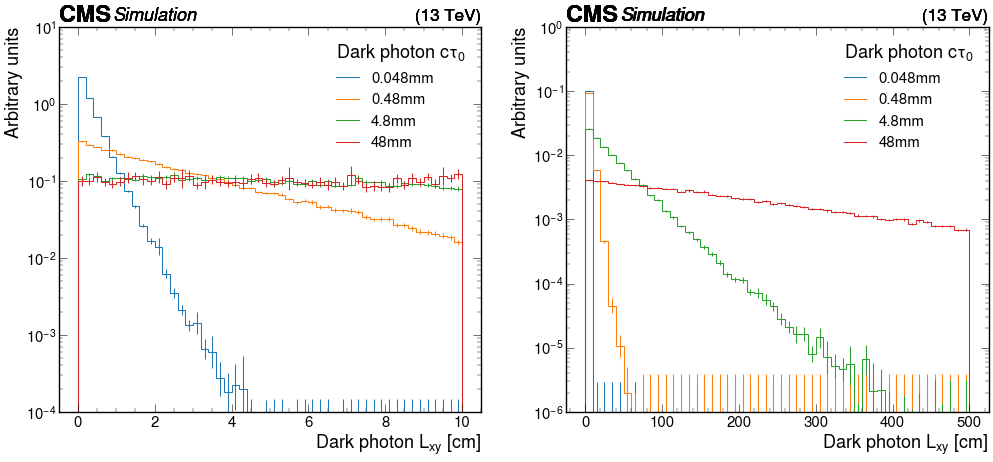

In [5]:
ctaus = [s.split("_")[-1].replace('p', '.') for s in extra_ctau_samples]
plt.subplots(1, 2, figsize=(2*12, 10))
plt.subplot(1, 2, 1)
for sample in extra_ctau_samples:
    utilities.plot(extra_ctau_out[sample]["hists"]["genA_lxy_lowRange"][channels[0], ::2j], density=True)
    plt.legend(ctaus, title=r"Dark photon $c\tau_0$", alignment="left")
    plt.ylim(1e-4, 10)
    plt.yscale("log")
    plt.ylabel("Arbitrary units")
plt.subplot(1, 2, 2)
for sample in extra_ctau_samples:
    utilities.plot(extra_ctau_out[sample]["hists"]["genA_lxy"][channels[0], ::2j], density=True)
    plt.legend(ctaus, title=r"Dark photon $c\tau_0$", alignment="left")
    plt.ylim(1e-6, 1)
    plt.yscale("log")
    plt.ylabel("Arbitrary units")
plt.savefig("../../plots/dark_photon_lxy.pdf", bbox_inches="tight")